In [136]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 

df1 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Topic_Survey_Assignment.csv')
mpl.style.use('ggplot')
print('done!')

done!


In [137]:
df.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [138]:
#sort by descending order
df = df.sort_values(['Very interested'], ascending = False , axis = 0).head(6)
df

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [139]:
#convert numbers into percentages
df['Very interested'] = df['Very interested'].div(2233)
df['Very interested'] = df['Very interested']*100

df['Somewhat interested'] = df['Somewhat interested'].div(2233)
df['Somewhat interested'] = df['Somewhat interested']*100

df['Not interested'] = df['Not interested'].div(2233)
df['Not interested'] = df['Not interested']*100


In [146]:
df.round(2)

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


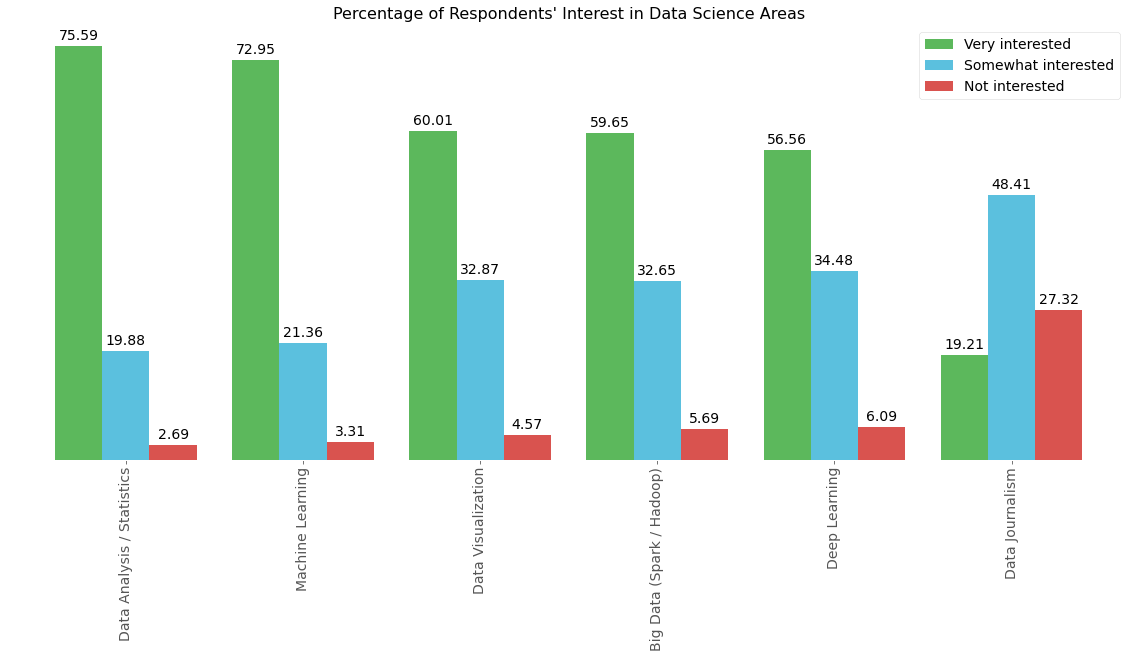

In [165]:
#plot barchart

#figure size of 20,8
#barwidth of 0.8
#use the 3 different colors stated
#use fontsize 14
ax = df.plot(kind='bar', figsize=(20, 8), width=0.8, color = ('#5cb85c','#5bc0de','#d9534f'), fontsize=14)

#use fontsize 16 for title
ax.set_title('''Percentage of Respondents' Interest in Data Science Areas''', fontsize=16)

#set back ground color
ax.set_facecolor('white')
ax.get_yaxis().set_visible(False)

#remove borders
plt.legend(fontsize = 14, facecolor='white')

#show percentage values in barchart
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
!conda install -c conda-forge folium=0.5.0 --yes
import folium

df1 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Police_Department_Incidents_-_Previous_Year__2016_.zip')
print('Folium installed and imported!')

In [2]:
df1.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [21]:
# we can use the value_counts method to get the total population per year
df_count = pd.DataFrame(df1['PdDistrict'].value_counts())

# reset the index to put in back in as a column in the df_tot dataframe
df_count.reset_index(inplace = True)

# rename columns
df_count.columns = ['Neighbourhood', 'Count']

# view the final dataframe
df_count

,Neighbourhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [ ]:
#geojson file
sanfran_geo = r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/san-francisco.geojson'

# create a san francisco map
san_fran_map = folium.Map(location=[37.77, -122.42], zoom_start=12)

# generate choropleth map 
san_fran_map.choropleth(
    geo_data=sanfran_geo,
    data=df_count,
    columns=['Neighbourhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)
